In [278]:
import datetime as dt
import pandas as pd
import pandas_datareader as web
from fredapi import Fred
fred = Fred(api_key='c9fa6f012c9ea24190b41703d64f6d08')

# 'start' et "end" correspondent à la date de début et la date de fin des séries de donnés que nous allons importer
start = dt.datetime(2017, 4, 1)
end = dt.datetime(2022, 3, 1)

# "var_indep_dict" est le dictionnaire stockant les variables explicative. Les clefs correspondent aux codes des données et
# les valeurs sont des dataframes
var_exp_dict = {}

var_exp_df = pd.DataFrame()

var_exp = ['dhhngsp','dcoilwtico','dcoilbrenteu','dpropanembtx','dhoilnyh','willresipr',
           'vixcls','gvzcls','ovxcls','vxvcls', 'dexuseu', 'dexusuk', 'dexchus', 'dexjpus', 'dexkous',
           'dexmxus', 'dexinus', 'dexvzus', 'dexbzus', 'dexszus', 'IHLCHG10740', "IHLCHG10420", "IHLCHG28940", 
           "IHLCHG44060", "DTWEXEMEGS", "USRECD", "EURORECD", "JPNRECDP", "SP500", "UNRATE"
          ]

for i in var_exp:
    # téléchargement sur la fed américaine à l'aide de pandas datareader
    var_exp_dict[i] = web.DataReader(i.upper(), 'fred', start, end)
    if var_exp_df.empty:
        var_exp_df = var_exp_dict[i]
    else:
        var_exp_df = var_exp_df.join(var_exp_dict[i])


var_exp_df.index = var_exp_df.index.to_pydatetime()


In [279]:
var_exp_df.describe()

,DHHNGSP,DCOILWTICO,DCOILBRENTEU,DPROPANEMBTX,DHOILNYH,WILLRESIPR,VIXCLS,GVZCLS,OVXCLS,VXVCLS,...,IHLCHG10740,IHLCHG10420,IHLCHG28940,IHLCHG44060,DTWEXEMEGS,USRECD,EURORECD,JPNRECDP,SP500,UNRATE
count,1238.000000,1230.000000,1251.000000,1227.000000,1229.000000,1238.000000,1237.00000,1239.000000,1239.000000,1237.000000,...,547.000000,547.000000,547.000000,547.000000,1223.000000,1287.000000,1286.000000,1286.000000,1237.000000,44.000000
mean,2.968813,57.290976,61.889049,0.755570,1.771966,249.464071,18.95966,15.109298,39.887401,20.883145,...,18.301097,12.297989,20.633638,29.113711,122.447140,0.038073,0.510109,0.207621,3205.383654,5.218182
std,1.106153,14.069899,14.802249,0.269545,0.404789,29.797305,8.82120,5.005290,24.939627,7.825016,...,35.003178,27.852152,31.150108,40.603073,4.758276,0.191447,0.500092,0.405761,686.856268,2.549443
min,1.330000,-36.980000,9.120000,0.203000,0.562000,160.220000,9.14000,8.880000,17.860000,11.850000,...,-41.600000,-39.600000,-32.700000,-39.800000,113.151900,0.000000,0.000000,0.000000,2237.400000,3.500000
25%,2.442500,49.145000,52.645000,0.513500,1.515000,230.912500,12.98000,11.470000,28.430000,15.170000,...,-7.600000,-7.550000,-2.350000,-1.900000,119.508500,0.000000,0.000000,0.000000,2707.880000,3.800000
50%,2.820000,57.460000,63.810000,0.735000,1.853000,242.250000,16.86000,13.970000,34.230000,19.280000,...,10.500000,8.000000,11.300000,21.400000,122.682000,0.000000,1.000000,0.000000,2926.170000,4.150000
75%,3.130000,66.405000,71.600000,0.945000,2.019000,266.142500,22.13000,17.080000,40.800000,24.840000,...,52.650000,35.850000,47.850000,60.550000,124.429050,0.000000,1.000000,0.000000,3668.100000,5.925000
max,23.860000,103.660000,110.930000,1.498000,3.135000,334.410000,82.69000,48.980000,325.150000,72.980000,...,74.800000,56.600000,76.100000,113.100000,137.310400,1.000000,1.000000,1.000000,4796.560000,14.700000


In [280]:
dict_direction = {"ALIMENTAIRE":"COW_TO",
                  "COMMODITÉS":"VPU",
                  "CONSOMMATION":"XRT", 
                  "ÉNERGIE":"VDE",
                  "FINANCE":"KRE",
                  "TECHNOLOGIE":"VGT",
                  "STAPLES": "VCSAX",
                  "TRANSPORT": "XTN",
                  "REALESTATE": "VNQ"
                  }


In [281]:
import numpy as np

dependent_var_dict = {}
format = "%Y-%m-%d"
for elem in dict_direction:
    dependent_var_dict[elem] = pd.read_csv(f"{dict_direction[elem]}.csv", index_col=0)
    dependent_var_dict[elem].index = [datetime.strptime(time, format) for time in dependent_var_dict[elem].index]

In [282]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Ce pipeline permet de créer un objet permettant de modifier mon dataset (variable indep) pour augmenter la performance du modèle
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # toutes les valeurs vides seront remplacées par la médiane de la colonne
        ('std_scaler', StandardScaler()) # transforme chaque colonne pour que mu = 0 & sigma = 1
    ])



In [292]:
var_exp_train = var_exp_df.iloc[0: -50][:]
var_exp_hypothesis = var_exp_df.iloc[-50:][:] # les 50 dernières observartions vont être utilisées pour déterminer quels secteurs d'activités sont sous-évaluée/sur-évalués


In [284]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

data_dict = {}
models_dict = {}

print("R-SQUARES")
for elem in dict_direction:

    timeserie_dep = dependent_var_dict[elem].index.tolist()
    timeserie_indep = var_exp_train.index.tolist()

    timeserie = [date for date in timeserie_indep if date in timeserie_dep]
    
    
    indep_var = np.array(var_exp_df.loc[timeserie])

    indep_var = pipeline.fit_transform(indep_var)
    data_dict[elem] = {'dep_var': dependent_var_dict[elem], 'indep_var': indep_var}

    model = LinearRegression()

    models_dict[elem] = model.fit(indep_var, np.array(dependent_var_dict[elem].loc[timeserie]['Close']))
    #print(models_dict[elem].coef_)
    print(model.score(indep_var, np.array(dependent_var_dict[elem].loc[timeserie]['Close'])))
 


R-SQUARES
0.9629829929923703
0.9633939588421262
0.982839268088991
0.9774452433255408
0.9366477387325386
0.9979448324676902
0.9841689364142991
0.9752793922104925
0.9978455543305869


In [297]:
timeserie = var_exp_hypothesis.index.to_list()

data_spread = {}
for elem in dependent_var_dict:
    timeserie = [time for time in timeserie if time in dependent_var_dict[elem].index]
    dependent_var = dependent_var_dict[elem].loc[timeserie]
    independent_var = np.array(var_exp_hypothesis.loc[timeserie])
    independent_var = pipeline.fit_transform(independent_var)
    est_values = models_dict[elem].predict(independent_var)
    data_spread[elem] = pd.DataFrame({'Value':dependent_var.Close, 'Prediction': est_values})

    


[ 8.71960615e-04  2.51996666e-01 -1.18056143e-01 -2.81471219e-01
 -6.75554190e-01  9.50997919e+00  4.49011245e-01  4.27682914e-02
 -2.27406719e-01 -4.87148136e-01 -3.42801136e-02  2.50113709e-01
  3.08570967e-01  1.97017639e-02  1.37710961e-01  1.00737613e-01
 -3.33535573e-01  3.24056753e-01  2.90909949e-01  1.42692120e-02
  4.97534415e-01 -1.21103317e+00  4.03953497e-01 -4.78011648e-01
 -2.61866529e-01  2.04338582e-01 -7.28003491e-01  4.46007742e-02
  1.49163106e+00 -1.74269460e-02]


<AxesSubplot:>

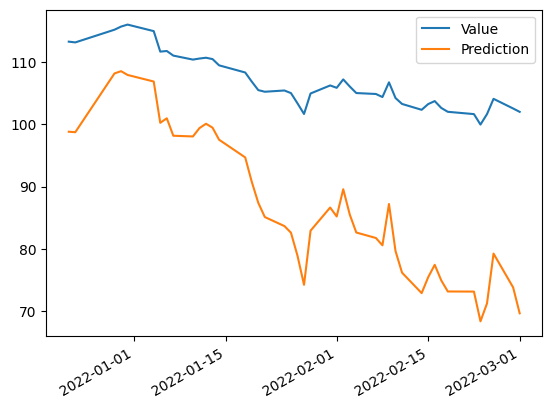

In [307]:
import matplotlib.pyplot as plt
print(models_dict['REALESTATE'].coef_)
data_spread['REALESTATE'].plot()

In [ ]:
dict_direction = {"ALIMENTAIRE":"COW_TO",
                  "COMMODITÉS":"VPU",
                  "CONSOMMATION":"XRT", 
                  "ÉNERGIE":"VDE",
                  "FINANCE":"KRE",
                  "TECHNOLOGIE":"VGT",
                  "STAPLES": "VCSAX",
                  "TRANSPORT": "XTN",
                  "REALESTATE": "VNQ"
                  }

# Compte rendu

Les modèles de régression linéaire ayant été créés semblent indiquer quelques tendances:

* Les facteurs structurels de l'économie (prix de l'essence, rendement boursiers, taux de change) semblent indiquer que la plupart des actifs sont surévalués

* À ma surprise, le secteur "énergie" est le seul que le modèle considère comme sous-évalué

* Tous les autres secteurs sont sur-évalués selon mon modèle, et par beaucoup!


# Limitations

Voici les limitations/erreurs que je perçois dans ce modèle:

* Il y colinéarité entre certains indicateurs

* Le modèle ne fût pas entraîné sur l'année 2022, ce qui ne lui permet pas d'apprendre les nouvelles conditions économiques qui sous-tendent l'économie actuelle

* Le modèle fût entrainé pour le 2/5 de ces données durant les années 2020 & 2021, une période d'expansion monétaire très différente de la periode de contraction monétaire actuelle

* Le modèle de regression linéaire dont j'ai fais usage permet seulement d'observer des relations linéaires, un différent algorithme comme SGD ou BoostingTree, 
    aurait eu la capacité d'explorer les variables avec plus de profondeur

# Conclusion

* Certains facteurs structurels semblent indiquer que les marchés sont euphoriques et qu'une analyse (incluant l'utilisation de modèles plus poussés) serait de mise

* Le modèle indique que le secteur de l'énergie est sous-évalués, un prochain modèle devra essayer de faire disparaitre cet écart (en évitant le overfitting), si cet écart
    perdure, le secteur de l'énergie pourrait être une sérieuse opportunitée.